In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing data
data = pd.read_csv('ecommerce_data.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# shape of data
data.shape

(541909, 8)

In [4]:
# getting the UK customer segments only
mydata = data[data.Country == 'United Kingdom']
mydata.Country.unique()

array(['United Kingdom'], dtype=object)

In [5]:
# checking the UK customer records that has NANs
mydata.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [6]:
# dropping rows with null values in CustomerID & checking final shape of data
mydata = mydata.dropna(subset=['CustomerID'], how='all')
mydata.shape

(361878, 8)

In [7]:
# number of orders
mydata.InvoiceNo.nunique()

19857

In [8]:
# number of unique products
mydata.StockCode.nunique()

3661

In [9]:
# number of unique customers
mydata.CustomerID.nunique()

3950

## RECENCY

In [10]:
# current date
import time
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [12]:
# creating date column in DatetimeIndex context
mydata['date'] = pd.DatetimeIndex(mydata['InvoiceDate']).date
mydata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [13]:
# create last purchase date & recency_df by CustomerID
recency_df = mydata.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [14]:
# create recency column in days
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df = recency_df.drop('LastPurchaseDate', axis=1)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


## FREQUENCY

In [15]:
# dropping duplicate Invoices
mydata_clean = mydata.drop_duplicates(subset=['InvoiceNo'], keep='first')

# creating frequncy df by CutsomerID and order counts
frequency_df = mydata_clean.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df

,CustomerID,Frequency
0,12346.0,2
1,12747.0,11
2,12748.0,224
3,12749.0,8
4,12820.0,4
...,...,...
3945,18280.0,1
3946,18281.0,1
3947,18282.0,3
3948,18283.0,16


## MONETARY

In [16]:
# creating total cost column
mydata['TotalCost'] = mydata['UnitPrice'] * mydata['Quantity']
mydata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [17]:
# creating Monetay df by CustomerID and total cost
monetary_df = mydata.groupby(by='CustomerID', as_index=False).agg({'TotalCost':'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


## RFM TABLE

In [18]:
# creating RFM Table
temp = recency_df.merge(frequency_df, on='CustomerID')
rfm = temp.merge(monetary_df, on='CustomerID')
rfm = rfm.set_index('CustomerID')
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12747.0,2,11,4196.01
12748.0,0,224,29072.10
12749.0,3,8,3868.20
12820.0,3,4,942.34
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [19]:
# creating quartiles for each parameter
quartiles = rfm.quantile(q=[0.25,0.50,0.75])
quartiles

,Recency,Frequency,Monetary
0.25,16.0,1.0,282.2550
0.50,50.0,3.0,627.0600
0.75,143.0,5.0,1521.7825


In [20]:
# calling Q-25 for Recency
quartiles['Recency'][0.25]

16.0

In [21]:
# defining functions for R Scoring
def RScore(x,s,d):
    if x <= d[s][0.25]:
        return 4
    elif (x > d[s][0.25]) & (x <= d[s][0.50]):
        return 3
    elif (x > d[s][0.50]) & (x <= d[s][0.75]):
        return 2
    else:
        return 1

# defining functions for F Scoring
def FScore(x,s,d):
    if x <= d[s][0.25]:
        return 1
    elif (x > d[s][0.25]) & (x <= d[s][0.50]):
        return 2
    elif (x > d[s][0.50]) & (x <= d[s][0.75]):
        return 3
    else:
        return 4

# defining functions for M Scoring
def MScore(x,s,d):
    if x <= d[s][0.25]:
        return 1
    elif (x > d[s][0.25]) & (x <= d[s][0.50]):
        return 2
    elif (x > d[s][0.50]) & (x <= d[s][0.75]):
        return 3
    else:
        return 4
    
    
# applying function & getting the final RFM Groups & Scores    
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency',quartiles))
rfm['F'] = rfm['Frequency'].apply(FScore, args=('Frequency',quartiles))
rfm['M'] = rfm['Monetary'].apply(MScore, args=('Monetary',quartiles))
rfm['RFMGroup'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str) 
rfm['RFMScore'] = rfm['R'] + rfm['F'] + rfm['M']
rfm

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,2,1,121,4
12747.0,2,11,4196.01,4,4,4,444,12
12748.0,0,224,29072.10,4,4,4,444,12
12749.0,3,8,3868.20,4,4,4,444,12
12820.0,3,4,942.34,4,3,3,433,10
...,...,...,...,...,...,...,...,...
18280.0,277,1,180.60,1,1,1,111,3
18281.0,180,1,80.82,1,1,1,111,3
18282.0,7,3,176.60,4,2,1,421,7


## CUSTOMER SEGMENTATIONS

In [22]:
print('Platinum Customers:',len(rfm[rfm.RFMGroup == '444']))

Platinum Customers: 442


In [23]:
print('Gold Customers:',len(rfm[(rfm.RFMScore >= 9) & (rfm.RFMScore <= 11)]))

Gold Customers: 1019


In [24]:
print('Potential Platinum Customers:',len(rfm[rfm.RFMGroup == '344']))

Potential Platinum Customers: 204


In [25]:
print('Big Spenders:',rfm[rfm.M == 4]['M'].count())

Big Spenders: 988


In [26]:
print('Regular Customers:',rfm[rfm.F == 4]['F'].count())

Regular Customers: 978


In [27]:
print('Almost Lost:',rfm[(rfm.RFMGroup == '244')|(rfm.RFMGroup == '234')
                         |(rfm.RFMGroup == '243')|(rfm.RFMGroup == '233')]['RFMGroup'].count())

Almost Lost: 254


In [28]:
print('Lost Valuable Customers:',rfm[(rfm.RFMGroup == '144')|(rfm.RFMGroup == '134')
                         |(rfm.RFMGroup == '143')|(rfm.RFMGroup == '133')]['RFMGroup'].count())

Lost Valuable Customers: 59


In [29]:
print('Lost Cheap Customers:',rfm[rfm.RFMGroup == '111']['RFMGroup'].count())

Lost Cheap Customers: 367


## VISUALIZATIONS

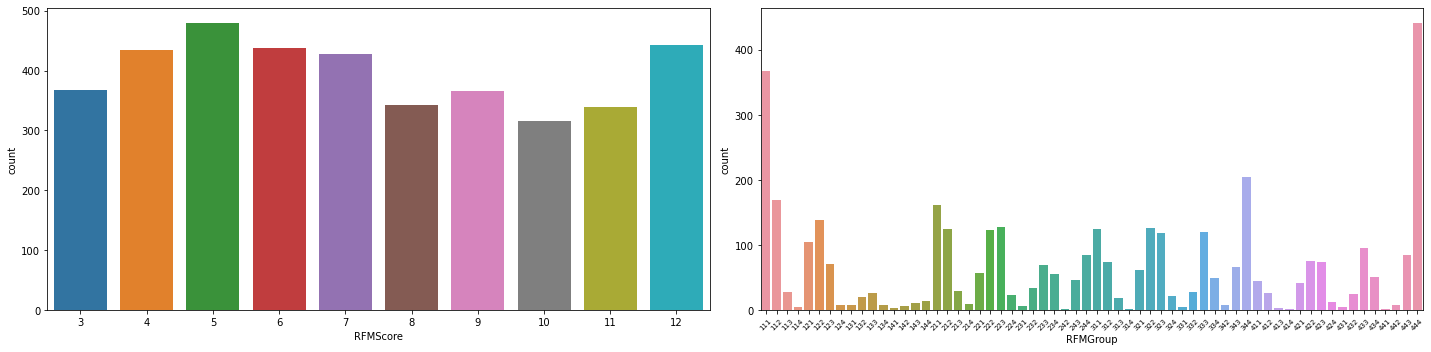

In [30]:
# plotting RFMScore & RFMGroup
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(rfm.RFMScore, ax=ax[0])
sns.countplot(rfm.RFMGroup, ax=ax[1], order=rfm.RFMGroup.value_counts().sort_index().index)
plt.xticks(rotation=45, fontsize=7)
fig.tight_layout()